In [1]:
import tweepy
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import random
import glob
from textblob import TextBlob
import io
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# twitter app credentials
consumer_key = "hz76GGcveHsN26QvAcTHhDVnn" 
consumer_secret = "hrBmAzughGzIV7oMvYnMb3JqXBEa4nXnrhzNSDQ7pTPnjaxi4n"
access_key = "2547850260-XM9U6ggp4KjqEROWzuqtHlNAjYia6tVOiLaXJXg"
access_secret = "AkmHcW1PaEzfoD11XyMDWxXqXDzY02G19Lt4FGWgyclsW"

# Authorization to consumer key and consumer secret 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Access to user's access key and access secret 
auth.set_access_token(access_key, access_secret)

# Calling api 
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
# Tweets to be extracted for AmazonIN
search_words_amazon = "amazonIN -filter:retweets"
t_amazon = tweepy.Cursor(api.search,
                       q = search_words_amazon,
                       lang = "en").items(3000)
amazon_tweets = [tweet.text for tweet in t_amazon]

In [5]:
len(amazon_tweets)

3000

In [6]:
# Tweets to be extracted for Flipkart
search_words_flipkart = "flipkart -filter:retweets"
t_flipkart = tweepy.Cursor(api.search,
                       q = search_words_flipkart,
                       lang = "en").items(3000)
flipkart_tweets = [tweet.text for tweet in t_flipkart]

In [7]:
len(flipkart_tweets)

3000

In [8]:
# Tweets to be extracted for Snapdeal
search_words_snapdeal = "snapdeal -filter:retweets"
t_snapdeal = tweepy.Cursor(api.search,
                       q = search_words_snapdeal,
                       lang = "en").items(3000)
snapdeal_tweets = [tweet.text for tweet in t_snapdeal]

In [9]:
len(snapdeal_tweets)

694

In [31]:
# Tweets to be extracted for Croma retail
search_words_croma = "cromaretail -filter:retweets"
t_croma = tweepy.Cursor(api.search,
                       q = search_words_croma,
                       lang = "en").items(3000)
croma_tweets = [tweet.text for tweet in t_croma]

In [32]:
len(croma_tweets)

319

In [33]:
# Tweets to be extracted for reliance digital
search_words_reliance = "reliancedigital -filter:retweets"
t_reliance = tweepy.Cursor(api.search,
                       q = search_words_reliance,
                       lang = "en").items(3000)
reliance_tweets = [tweet.text for tweet in t_reliance]

In [34]:
len(reliance_tweets)

251

In [35]:
# Tweets to be extracted for shopclues
search_words_shopclues = "shopclues -filter:retweets"
t_shopclues = tweepy.Cursor(api.search,
                       q = search_words_shopclues,
                       lang = "en").items(3000)
shopclues_tweets = [tweet.text for tweet in t_shopclues]

In [36]:
len(shopclues_tweets)

222

In [37]:
# Tweets to be extracted for Paytm Mall
search_words_paytm = "paytmmall -filter:retweets"
t_paytm = tweepy.Cursor(api.search,
                       q = search_words_paytm,
                       lang = "en").items(3000)
paytm_tweets = [tweet.text for tweet in t_paytm]

In [38]:
len(paytm_tweets)

190

In [39]:
# Tweets to be extracted for Vijay sales
search_words_vijaysales = "vijaysales -filter:retweets"
t_vijaysales = tweepy.Cursor(api.search,
                       q = search_words_vijaysales,
                       lang = "en").items(3000)
vijaysales_tweets = [tweet.text for tweet in t_vijaysales]

In [40]:
len(vijaysales_tweets)

88

In [41]:
# Tweets to be extracted for Tata Cliq
search_words_tatacliq = "tatacliq -filter:retweets"
t_tatacliq = tweepy.Cursor(api.search,
                       q = search_words_tatacliq,
                       lang = "en").items(3000)
tatacliq_tweets = [tweet.text for tweet in t_tatacliq]

In [42]:
len(tatacliq_tweets)

164

### Since there are only two companies which have 3000 tweets, we will continue our Analysis with amazonIN and Flipkart only

In [10]:
# convert list of tweets to a dataframe
amazon_tweets_df = pd.DataFrame({'tweets' : amazon_tweets})
flipkart_tweets_df = pd.DataFrame({'tweets' : flipkart_tweets})

In [11]:
# list of stop words
stop_words = list(set(stopwords.words('english')))

# function to clean the data
def cleanse(input_text):
    keep_alpha = re.sub("[^a-zA-Z]"," ",input_text)
    remove_extra_spaces = re.sub("[\s]+"," ",keep_alpha)
    convert_case = remove_extra_spaces.lower()
    stop_words_removal = [word for word in convert_case.split()
                          if word not in stop_words]
    remove_smaller_words = [word for word in stop_words_removal
                          if len(word) >=3]
    clean_tokens = [word for word in remove_smaller_words
                   if 'http' not in word and
                   '@' not in word and
                   '<' not in word and
                   'RT' not in word]
    return " ".join(clean_tokens)

# lemmatizer object
lemmatizer = WordNetLemmatizer()

# function to lemmatize
def lemmatize(input_text):
    lemmas=[]
    tokens = input_text.split()
    for token in tokens:
        tag = nltk.pos_tag([token])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        if tag in tag_dict.keys():
            pos = tag_dict[tag]
            lemma = lemmatizer.lemmatize(token,pos)
            lemmas.append(lemma)
        else:
            lemmas.append(token)
    return " ".join(lemmas)

In [12]:
# run the function on dataframes
amazon_tweets_df['clean_tweets'] = amazon_tweets_df['tweets'].apply(cleanse)
amazon_tweets_df['clean_tweets'] = amazon_tweets_df['clean_tweets'].apply(lemmatize)

flipkart_tweets_df['clean_tweets'] = flipkart_tweets_df['tweets'].apply(cleanse)
flipkart_tweets_df['clean_tweets'] = flipkart_tweets_df['clean_tweets'].apply(lemmatize)

In [14]:
amazon_tweets_df.clean_tweets

0       amazonfashionin amazonin filmfare product revi...
1       snapdeal kunalbahl rohitkbansal productsindian...
2       amazonin cheap service service provider like t...
3       amazonin bad remote bundle firestick first use...
4       redmiindia flipkart amazonin redmi note user r...
                              ...                        
2995    vodafonein want issue resolve asap prime accou...
2996    bikashg flipkart amazonin amazon well experien...
2997                                   amazonin need help
2998    contribute betterment india hope win amazonin ...
2999    amazonin amazonpay bought new mobile go regist...
Name: clean_tweets, Length: 3000, dtype: object

In [15]:
flipkart_tweets_df.clean_tweets

0                top brand deodorant link drj rvdo qiryge
1       indiapoco flipkart order poco first sale get l...
2       flipkartsupport unable chat flipkart app load ...
3       flipkart flipkartsupport order one samsung lit...
4       indiapoco flipkart poco definitely best best p...
                              ...                        
2995    saha varsha flipkartsupport flipkart samsung d...
2996    flipkartsellers flipkart gamezone disable sell...
2997    cashify first time customer smooth process hig...
2998    ashishk ensure flipkart account information sa...
2999    flipkart flipkart india want sell product tami...
Name: clean_tweets, Length: 3000, dtype: object

In [17]:
# function to get sentiment
def get_sentiment(input_string):
    blob = TextBlob(input_string)
    sentiment = blob.sentiment.polarity
    return sentiment

In [18]:
# get sentiment
amazon_tweets_df['sentiment'] = amazon_tweets_df['clean_tweets'].apply(get_sentiment)
flipkart_tweets_df['sentiment'] = flipkart_tweets_df['clean_tweets'].apply(get_sentiment)

In [19]:
# counts
amazon_negative_counts = amazon_tweets_df[amazon_tweets_df['sentiment']<0].count()[0]
amazon_neutral_counts = amazon_tweets_df[amazon_tweets_df['sentiment']==0].count()[0]
amazon_positive_counts = amazon_tweets_df[amazon_tweets_df['sentiment']>0].count()[0]

flipkart_negative_counts = flipkart_tweets_df[flipkart_tweets_df['sentiment']<0].count()[0]
flipkart_neutral_counts = flipkart_tweets_df[flipkart_tweets_df['sentiment']==0].count()[0]
flipkart_positive_counts = flipkart_tweets_df[flipkart_tweets_df['sentiment']>0].count()[0]

In [20]:
y_pos = [0,1,2]

amazon_counts = [amazon_positive_counts, amazon_neutral_counts, amazon_negative_counts]
flipkart_counts = [flipkart_positive_counts, flipkart_neutral_counts, flipkart_negative_counts]

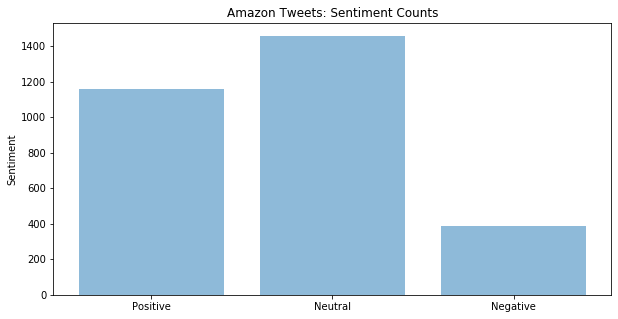

In [21]:
# plot amazon
plt.figure(figsize=(10,5))
plt.bar(y_pos, amazon_counts, align='center', alpha=0.5)
plt.xticks(y_pos,['Positive','Neutral','Negative'])
plt.ylabel('Sentiment')
plt.title('Amazon Tweets: Sentiment Counts')
plt.show()

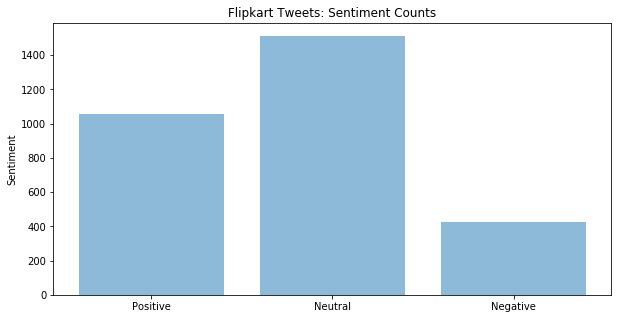

In [22]:
# plot flipkart
plt.figure(figsize=(10,5))
plt.bar(y_pos, flipkart_counts, align='center', alpha=0.5)
plt.xticks(y_pos,['Positive','Neutral','Negative'])
plt.ylabel('Sentiment')
plt.title('Flipkart Tweets: Sentiment Counts')
plt.show()

In [25]:
# TF-IDF vectorizer
vectorizer1 = TfidfVectorizer(ngram_range=(2,2),
                             max_features=100,
                             min_df=0.01,
                             max_df=0.80)

vectorizer2 = TfidfVectorizer(ngram_range=(2,2),
                             max_features=100,
                             min_df=0.01,
                             max_df=0.80)

In [26]:
# call
vectorizer1.fit_transform(amazon_tweets_df['clean_tweets'])
vectorizer2.fit_transform(flipkart_tweets_df['clean_tweets'])

<694x72 sparse matrix of type '<class 'numpy.float64'>'
	with 1510 stored elements in Compressed Sparse Row format>

In [28]:
# build a word cloud of top 25 words from amazon tweets

top_n= 25
indices = vectorizer1.idf_.argsort()[::-1] # sort by TF-IDF
features = vectorizer1.get_feature_names() # word list
top_features = [(features[i], vectorizer1.idf_[i],i)
               for i in indices[:top_n]]

d1 = {}
for i in top_features:
    d1[i[0]] = i[1]
    
w1 = WordCloud(background_color='white',
             max_words=200,
             max_font_size=200,
             height=2000,
             width=2000,
             colormap='rainbow').fit_words(d1)

w1.to_file('amazon_tweets.png')

<img src='amazon_tweets.png'>

In [29]:
# build a word cloud of top 25 words from flipkart tweets

#top_n= 25
indices = vectorizer2.idf_.argsort()[::-1] # sort by TF-IDF
features = vectorizer2.get_feature_names() # word list
top_features = [(features[i], vectorizer2.idf_[i],i)
               for i in indices[:top_n]]

d2 = {}
for i in top_features:
    d2[i[0]] = i[1]
    
w2 = WordCloud(background_color='white',
             max_words=200,
             max_font_size=200,
             height=2000,
             width=2000,
             colormap='rainbow').fit_words(d2)

w2.to_file('flipkart_tweets.png')

<img src='flipkart_tweets.png'>